# Exercise: Outlier removal using standard deviation and z score
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result


In [4]:
import pandas as pd

df = pd.read_csv("data/bhp.csv")
upper_limit = 0.999
lower_limit = 0.001
price_per_sqft = df["price_per_sqft"]

outlier_removed_df_using_percentiles = df[(price_per_sqft > price_per_sqft.quantile(lower_limit)) & (price_per_sqft < price_per_sqft.quantile(upper_limit))]

number_of_outliers_removed = df.shape[0] - outlier_removed_df_using_percentiles.shape[0]
print(f"Number of outliers removed: {number_of_outliers_removed}")

Number of outliers removed: 28


In [5]:
mean = outlier_removed_df_using_percentiles["price_per_sqft"].mean()
std = outlier_removed_df_using_percentiles["price_per_sqft"].std()
upper_limit_using_four_std = mean + 4 * std
lower_limit_using_four_std = mean - 4 * std

outlier_removed_df_using_four_std = outlier_removed_df_using_percentiles[(outlier_removed_df_using_percentiles["price_per_sqft"] < upper_limit_using_four_std) & (outlier_removed_df_using_percentiles["price_per_sqft"] > lower_limit_using_four_std)]
outlier_df = outlier_removed_df_using_percentiles[(outlier_removed_df_using_percentiles["price_per_sqft"] > upper_limit_using_four_std) | (outlier_removed_df_using_percentiles["price_per_sqft"] < lower_limit_using_four_std)]
print(f"Number of outliers removed: {outlier_removed_df_using_percentiles.shape[0] - outlier_removed_df_using_four_std.shape[0]}")

Number of outliers removed: 125


In [6]:
outlier_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


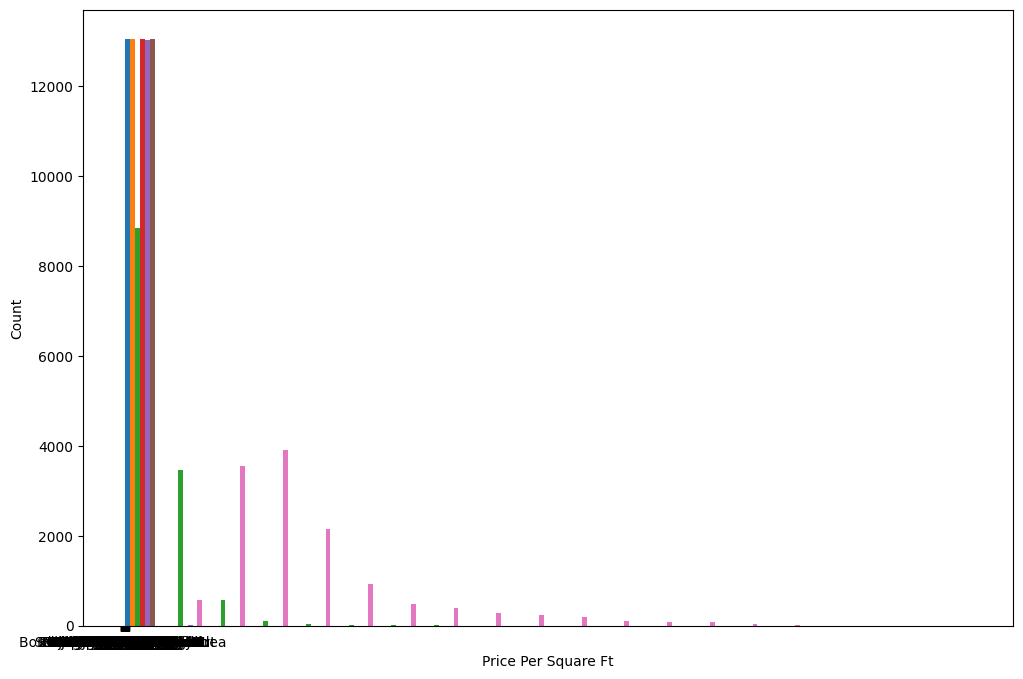

In [7]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["figure.figsize"] = (12,8)

plt.hist(outlier_removed_df_using_four_std, bins=20, rwidth=0.8)
plt.xlabel("Price Per Square Ft")
plt.ylabel("Count")
plt.show()

In [8]:
!pip install scipy

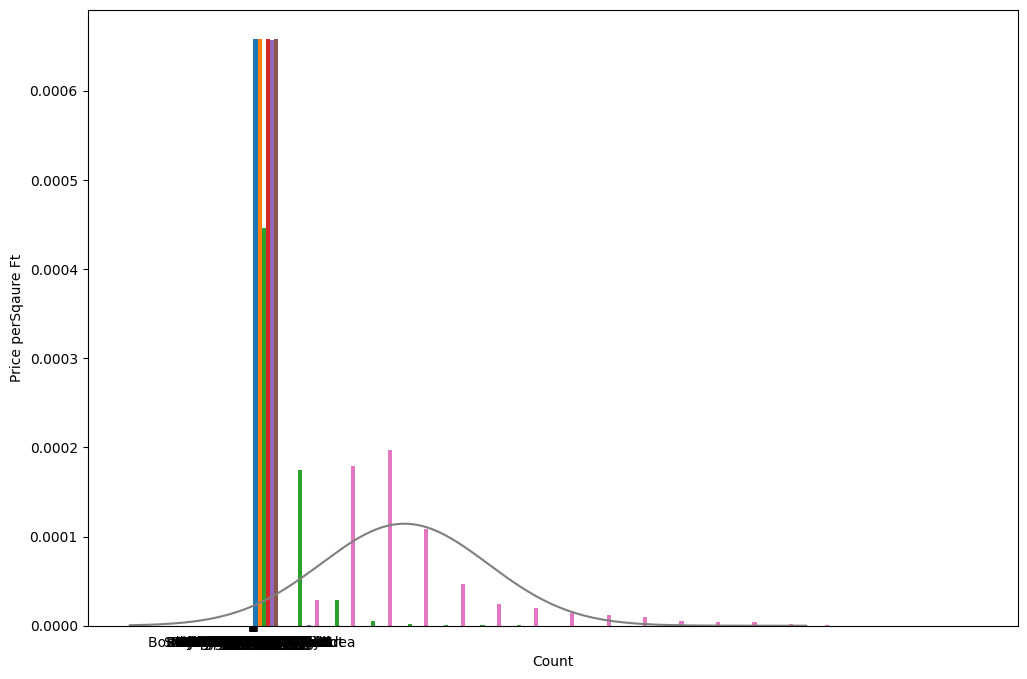

In [9]:
from scipy.stats import norm
import numpy as np

plt.hist(outlier_removed_df_using_four_std, bins=20, rwidth=0.8, density=True)
plt.xlabel('Count')
plt.ylabel('Price perSqaure Ft')
rng = np.arange(-5000, outlier_removed_df_using_four_std["price_per_sqft"].max(), 100)
plt.plot(rng, norm.pdf(rng, outlier_removed_df_using_four_std["price_per_sqft"].mean(), outlier_removed_df_using_four_std["price_per_sqft"].std()))